Here we will practice Standardization

In [14]:
#import the data

import pandas as pd
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day24-standardization/Social_Network_Ads.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)

data = pd.read_csv(data)

In [24]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [21]:
#choose only columns which are required
df = data.iloc[:,2:]

In [22]:
df.sample(5)

,Age,EstimatedSalary,Purchased
283,52,21000,1
209,46,22000,0
8,25,33000,0
95,35,44000,0
253,37,146000,1


In [23]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split(df.drop('Purchased',axis=1) ,df['Purchased'],test_size=0.3 , random_state=0)
x_train.shape , x_test.shape

((280, 2), (120, 2))

In [25]:
#perform standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [31]:
#this is the x_train after standardization , which is in numpy array
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [32]:
#this is the x_test after standardization , which is in numpy array
x_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

In [35]:
#now convert those numpy array into a proper daraframe
x_test_scaled = pd.DataFrame(x_test_scaled , columns=x_test.columns)
x_train_scaled = pd.DataFrame(x_train_scaled , columns=x_test.columns)

In [36]:
x_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [37]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [41]:
#now in last observe that the mean is 0 & SD is 1 .
import numpy as np
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'After Scaling')

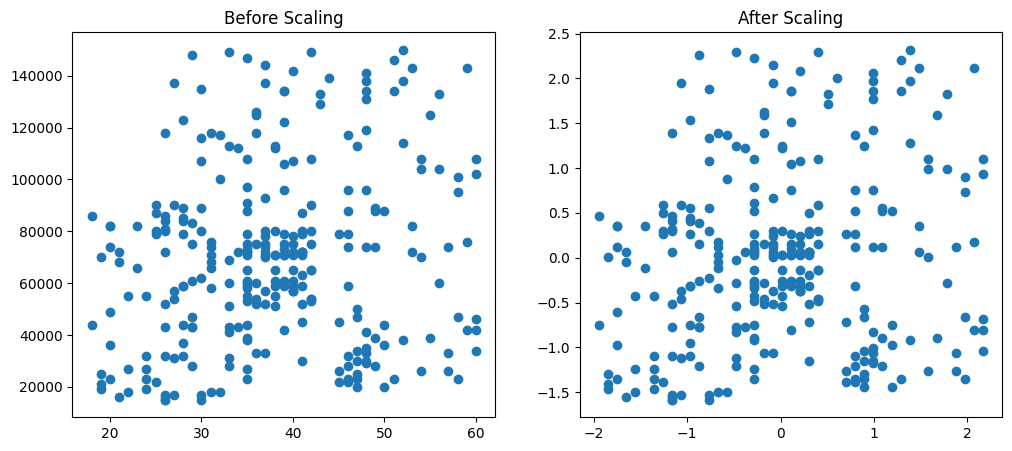

In [47]:
#we will see effect of standardization through graph
fig ,(ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (12,5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'])
ax2.set_title("After Scaling")


<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

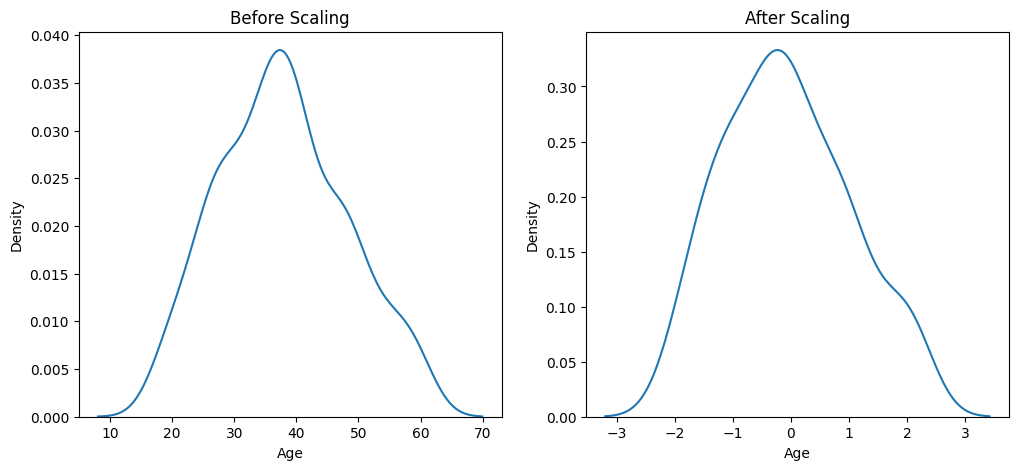

In [50]:
fig , (ax1 , ax2) = plt.subplots(ncols=2 , figsize = (12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)
ax2.set_title("After Scaling")
sns.kdeplot(x_test_scaled['Age'],ax=ax2)

<Axes: title={'center': 'After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

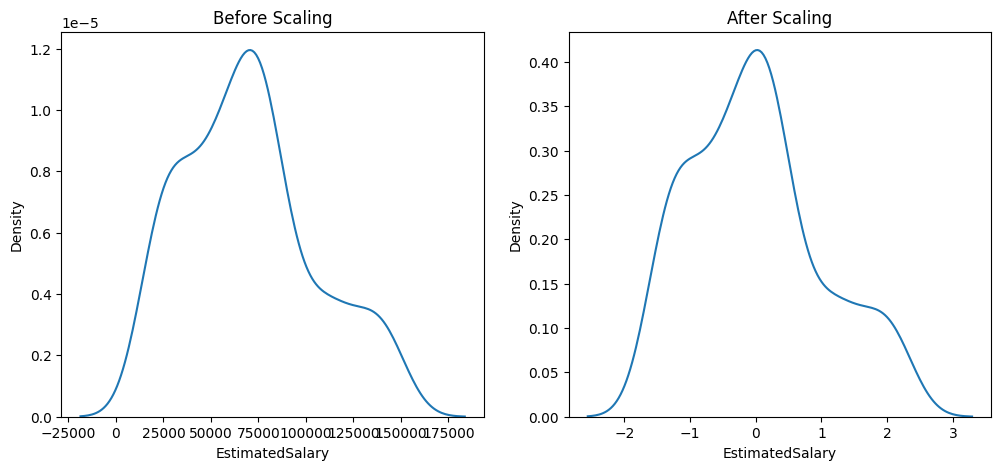

In [51]:
fig ,(ax1,ax2) = plt.subplots(ncols=2 , figsize =(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

the only thing is changed is the feature scaling ,  the distribution remain same